# Is Bitcoin a Good Investment?
**Author:** S Shivani
**Date:** 12-02-2025

This project analyzes Bitcoin's historical performance to assess whether it is a good investment. The analysis follows the Google Data Analytics Process (Ask, Prepare, Process, Analyze, Share, Act).


## Ask Phase
### Objective:
To analyze Bitcoin's historical performance and assess its investment potential.

### Guiding Questions:
- What are the key metrics for evaluating Bitcoin's performance?
- How does Bitcoin's performance compare to traditional investments like stocks and gold?
- What risks are associated with investing in Bitcoin?

### Key Tasks:
- Define the scope of the project.
- Identify stakeholders and their needs.

### Deliverables:
- Clear project objectives.
- Documented guiding questions.
- 

## Prepare Phase
### Data Sources:
- Bitcoin Historical Data (https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data)
- Gold Prices (https://www.kaggle.com/datasets/tunguz/gold-prices)

### Data Description:
- Bitcoin Historical Data: CSV files for select bitcoin exchanges for the time period of Jan 2012 to Present 
- Gold Prices: Historical Annual  Gold Prices. Retrieved from DataHub, and expected to be updated annually.

### Key Tasks:
- Verify data sources' credibility.
- Identify key columns for analysis.

### Deliverables:
- Documented data sources.
- Initial observations of the datasets.

In [9]:
import pandas as pd

# Load datasets
bitcoin_data = pd.read_csv(r"C:\Users\samav\Downloads\bitcoin_analysis_data.zip")
gold_data = pd.read_csv(r"C:\Users\samav\Downloads\gold_data.zip")


## Process Phase
### Data Cleaning:
- Handle missing values.
- Format date columns.
- Remove outliers if necessary.

### Deliverables:
- Cleaned datasets ready for analysis.

In [10]:
# Check for missing values in the Bitcoin dataset
print("Missing values in Bitcoin dataset:")
print(bitcoin_data.isnull().sum())

# Check for missing values in the Gold dataset
print("\nMissing values in Gold dataset:")
print(gold_data.isnull().sum())

# Fill missing values in the Bitcoin dataset
bitcoin_data['Open'] = bitcoin_data['Open'].fillna(bitcoin_data['Open'].median())
bitcoin_data['High'] = bitcoin_data['High'].fillna(bitcoin_data['High'].median())
bitcoin_data['Low'] = bitcoin_data['Low'].fillna(bitcoin_data['Low'].median())
bitcoin_data['Close'] = bitcoin_data['Close'].fillna(bitcoin_data['Close'].median())
bitcoin_data['Volume'] = bitcoin_data['Volume'].fillna(bitcoin_data['Volume'].mean())

# Convert the 'timestamp' column from Unix to human-readable format
bitcoin_data['Timestamp'] = pd.to_datetime(bitcoin_data['Timestamp'], unit='s')

# Display the first few rows to confirm the conversion
print(bitcoin_data.head())

# Drop rows where 'timestamp' is missing
bitcoin_data = bitcoin_data.dropna(subset=['Timestamp'])

# Fill missing values in the Gold dataset
gold_data['Price'] = gold_data['Price'].fillna(gold_data['Price'].median())

# Drop rows where 'date' is missing
gold_data = gold_data.dropna(subset=['Date'])

# Verify if all missing values are handled
print("\nBitcoin dataset after handling missing values:")
print(bitcoin_data.isnull().sum())

print("\nGold dataset after handling missing values:")
print(gold_data.isnull().sum())

Missing values in Bitcoin dataset:
Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Missing values in Gold dataset:
Date     0
Price    0
dtype: int64
            Timestamp  Open  High   Low  Close  Volume
0 2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0
1 2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0
2 2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0
3 2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0
4 2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0

Bitcoin dataset after handling missing values:
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64

Gold dataset after handling missing values:
Date     0
Price    0
dtype: int64


### Step 2: Handle Missing Data

#### Bitcoin Dataset:
- **Columns with missing values**: Checked for missing values in `open`, `high`, `low`, `close`, `volume`, and `timestamp`.
- **Strategy**:
  - Filled missing values in `open`, `high`, `low`, and `close` with the median to avoid the influence of outliers.
  - Filled missing values in `volume` with the mean for consistent handling of continuous data.
  - Dropped rows with missing `timestamp`.

#### Gold Dataset:
- **Columns with missing values**: Checked for missing values in `price` and `date`.
- **Strategy**:
  - Filled missing values in `price` with the median.
  - Dropped rows with missing `date`.

#### Outcome:
- Both datasets are now complete and ready for further analysis.

## Analyze Phase
### Objectives:
- Evaluate Bitcoin's historical performance.
- Compare Bitcoin with traditional investments.
- Assess volatility and risks.

### Key Tasks:
- Time series analysis
- Volatility analysis
- Correlation analysis

### Deliverables:
- Summary statistics.
- Visualizations of performance trends.

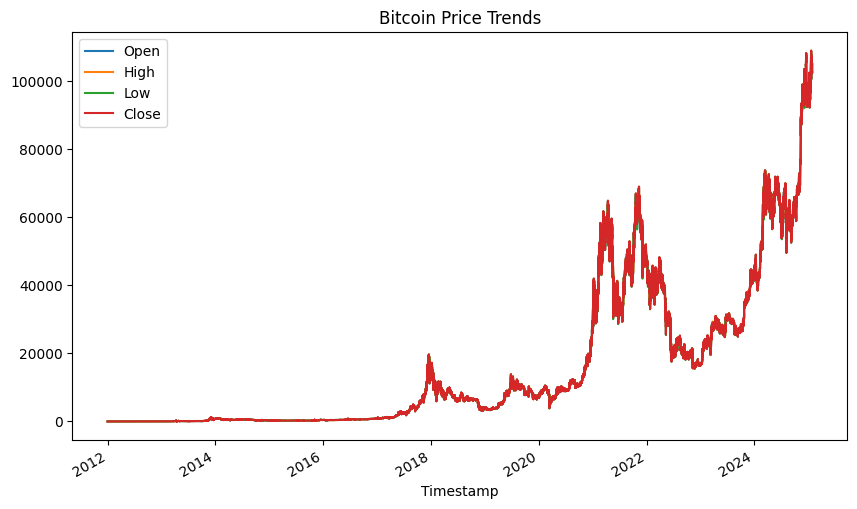

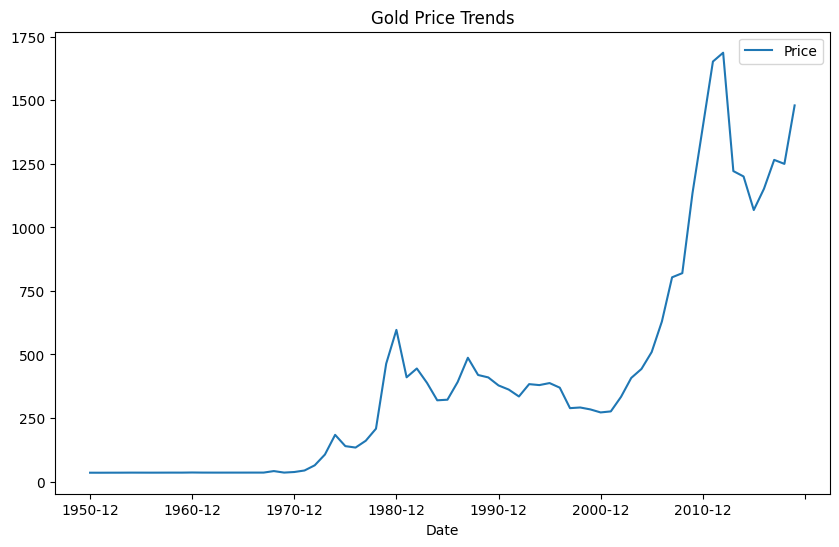

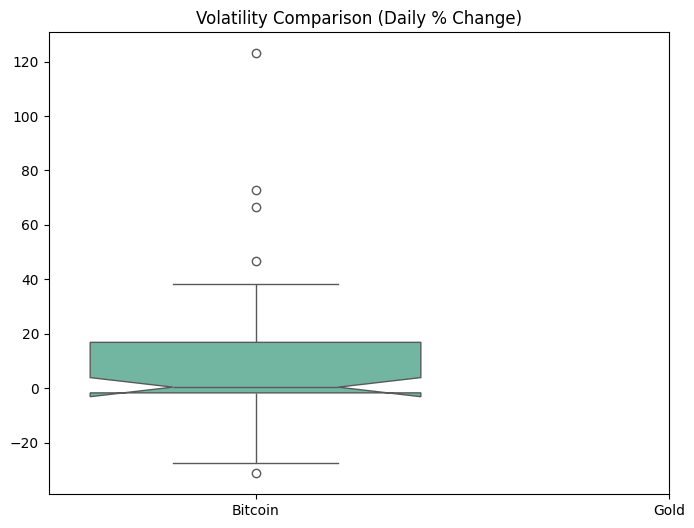

Correlation between Bitcoin and Gold prices:
       Close  Price
Close    NaN    NaN
Price    NaN    NaN


C:\Users\samav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\samav\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


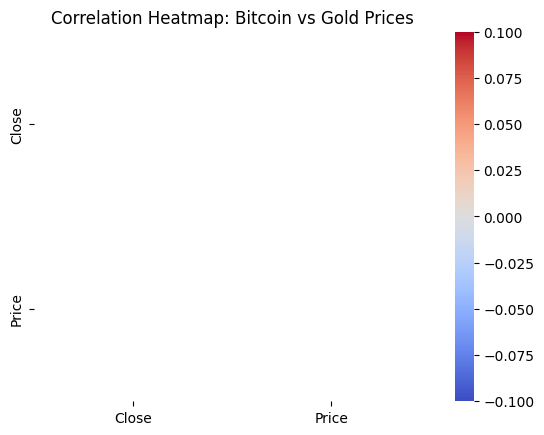

In [ ]:
# time series analysis
bitcoin_data.plot(x='Timestamp', y=['Open', 'High', 'Low', 'Close'], figsize=(10, 6), title='Bitcoin Price Trends')
gold_data.plot(x='Date', y='Price', figsize=(10, 6), title='Gold Price Trends')

# volatility anaysis
bitcoin_data['daily_pct_change'] = bitcoin_data['Close'].pct_change() * 100
gold_data['daily_pct_change'] = gold_data['Price'].pct_change() * 100

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=[bitcoin_data['daily_pct_change'].dropna(), gold_data['daily_pct_change'].dropna()], 
            notch=True, palette="Set2")
plt.xticks([0, 1], ['Bitcoin', 'Gold'])
plt.title('Volatility Comparison (Daily % Change)')
plt.show()

# correlation analysis
bitcoin_data['Date'] = bitcoin_data['Timestamp'].dt.date
merged_data =bitcoin_data.merge(gold_data, on='Date', how='inner')

correlation = merged_data[['Close', 'Price']].corr()
print("Correlation between Bitcoin and Gold prices:")
print(correlation)

sns.heatmap(correlation, annot=True, cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap: Bitcoin vs Gold Prices')
plt.show()

## Share Phase
### Key Insights:
- Bitcoin has experienced significant growth over the past decade.
- However, its volatility presents considerable risk to investors.

### Visuals:
- Include charts from the analysis.

## Act Phase
### Recommendations:
- Bitcoin can be a good investment for high-risk tolerant investors.
- Diversify your portfolio with other assets to minimize risk.